In [1]:
import math
import pandas as pd
import numpy as np
from IPython.utils import io
import matplotlib.pyplot as plt
%cd /home/jeroen/repos/traffic-scheduling/
from motion.direct_transcription import motion_synthesize

/home/jeroen/repos/traffic-scheduling


Lane between two intersections with capacity for a single waiting vehicle. We want to find out under what conditions a next vehicle can start entering the lane.

In [2]:
params = { 'dt': 0.01, 'vmax': 1, 'amax': 0.5, 'l': 1 }

In [3]:
def generate_tandem_trajectories(y, d, params):
    dt = params['dt']
    trajectories = []
    prev = None
    for start, end in y:
        yv = int(math.ceil(start / dt))
        yw = int(math.ceil(end / dt))

        if prev is not None:
            # extract the relevant steps from prev trajectory
            prev = prev[prev['t'] >= yv * dt]['x'].to_numpy()
        
        x = motion_synthesize(yw - yv + 1, d, prev=prev, **params)
        xd = pd.DataFrame(x, columns=['x'])
        xd['t'] = dt * np.array(range(yv, yw + 1))
        prev = xd.copy()
        trajectories.append(xd)
    return trajectories

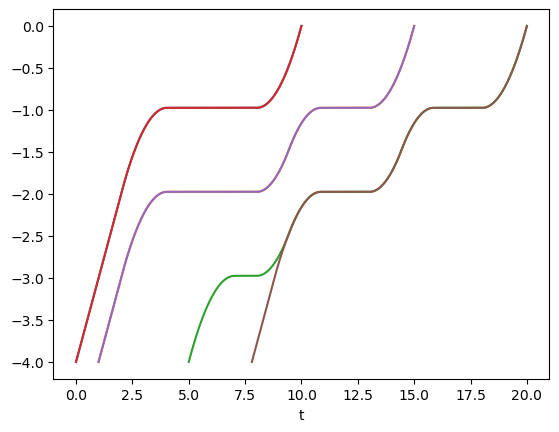

In [23]:
y1 = [[0, 10], [1, 15], [5, 20]]
y2 = [[0, 10], [1, 15], [7.8, 20]]

with io.capture_output() as captured:
    trajectories1 = generate_tandem_trajectories(y1, 4, params)
    trajectories2 = generate_tandem_trajectories(y2, 4, params)

fig, ax = plt.subplots()
for trajectory in trajectories1:
    trajectory.plot(x='t', y='x', legend=False, ax=ax)

for trajectory in trajectories2:
    trajectory.plot(x='t', y='x', legend=False, ax=ax)